/tmp/ipykernel_1203632/4169352034.py:16: UserWarning: Argument 'alpha_affine' is not valid and will be ignored.
  "ElasticTransform": A.ElasticTransform(alpha=50.0, sigma=50.0, alpha_affine=300.0, p=1.0),


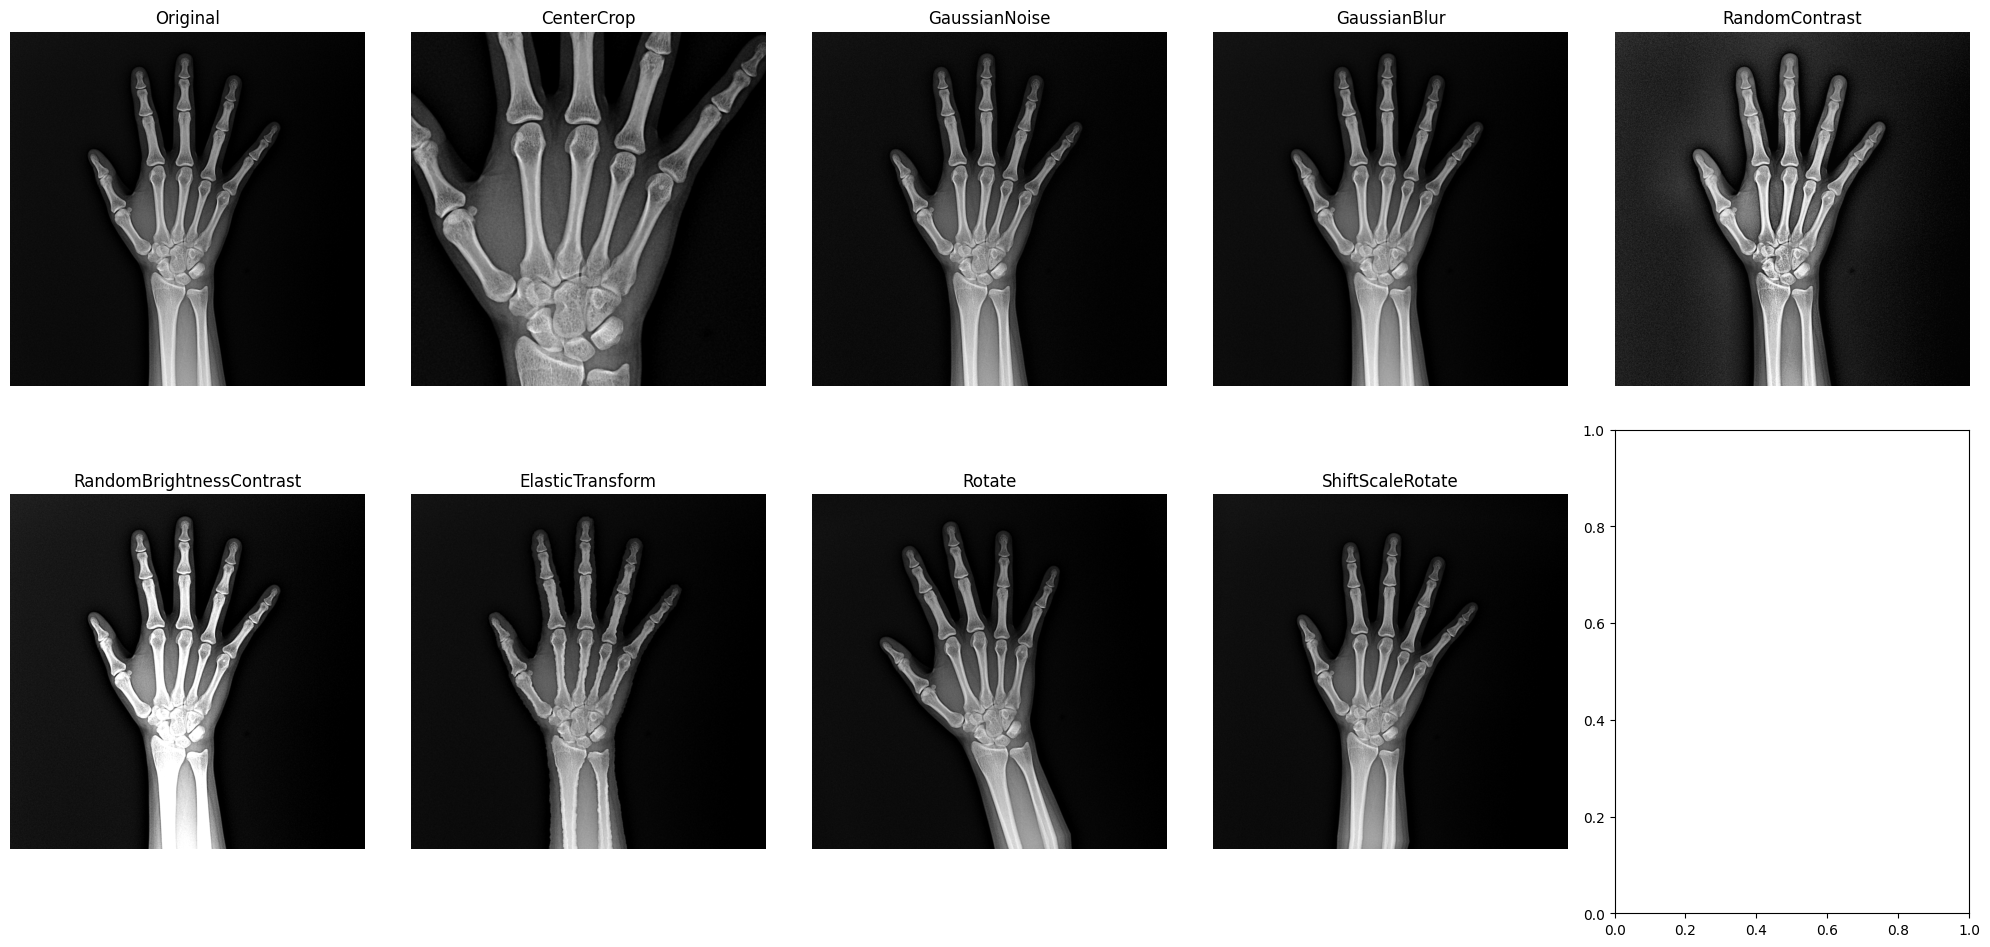

In [8]:
import albumentations as A
import cv2
import matplotlib.pyplot as plt

# Load the input X-ray image
image_path = "/data/ephemeral/home/data/train/DCM/ID001/image1661130828152_R.png"  # X-ray 이미지 경로를 입력하세요
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define transformations
augmentations = {
    "CenterCrop": A.CenterCrop(height=1024, width=1024, always_apply=True),
    "GaussianNoise": A.GaussNoise(var_limit=(10.0, 50.0), p=1.0),
    "GaussianBlur": A.GaussianBlur(blur_limit=(3, 7), p=1.0),
    "RandomContrast": A.CLAHE(clip_limit=4, tile_grid_size=(8,8), p=1.0),
    "RandomBrightnessContrast": A.RandomBrightnessContrast(brightness_limit=0.5, contrast_limit=0.5, p=1.0),
    "ElasticTransform": A.ElasticTransform(alpha=50.0, sigma=50.0, alpha_affine=300.0, p=1.0),
    "Rotate": A.Rotate(limit=30, p=1.0),
    "ShiftScaleRotate": A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.1, rotate_limit=30, p=1.0)
}

# Apply each transformation and store results
transformed_images = {}
for name, transform in augmentations.items():
    augmented = transform(image=original_image)
    transformed_images[name] = augmented['image']

# Visualize the original and transformed images
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()

# Show original image in the first subplot
axes[0].imshow(original_image, cmap='gray')
axes[0].set_title("Original")
axes[0].axis("off")

# Show transformed images
for idx, (name, img) in enumerate(transformed_images.items(), 1):
    axes[idx].imshow(img, cmap='gray')
    axes[idx].set_title(name)
    axes[idx].axis("off")

plt.tight_layout()
plt.show()
